In [1]:

# Gerekli kütüphanelerin yüklenmesi
#!pip install scikit-learn
#!pip install xgboost
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import snowballstemmer
from wordcloud import WordCloud

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier



In [2]:
#dataset : https://www.kaggle.com/datasets/burhanbilenn/duygu-analizi-icin-urun-yorumlari/data

df = pd.read_csv("magaza_yorumlari_duygu_analizi.csv",encoding = "utf-16")
df.head()

,Görüş,Durum
0,"ses kalitesi ve ergonomisi rezalet, sony olduğ...",Olumsuz
1,hizli teslimat tesekkürler,Tarafsız
2,ses olayı süper....gece çalıştır sıkıntı yok.....,Olumlu
3,geldi bigün kullandık hemen bozoldu hiçtavsiye...,Olumsuz
4,Kulaklığın sesi kaliteli falan değil. Aleti öv...,Olumsuz


In [3]:
# Kayıp veri kontrolü
print(df.isnull().sum())


df = df.dropna()

Görüş    3
Durum    0
dtype: int64


In [4]:

stop_words = set(stopwords.words('turkish'))
#stemmer = snowballstemmer.stemmer('turkish')

In [5]:
def preprocess_text(text):
    # Noktalamalar ve özel karakterlerin elenmesi
    text = re.sub(r'[^\w\s]', '', text)
    
    #Küçük harf dönüşümü
    text = text.lower()
    
    # Tokenize 
    words = word_tokenize(text)
    
    # stopwords
    words = [word for word in words if word not in stop_words]
    
    # Köke indirme uygulanacaksa
    #words = [stemmer.stemWord(word) for word in words]
    
    
    return ' '.join(words)

In [6]:
df['Processed_Review'] = df['Görüş'].apply(preprocess_text)
print(df[['Görüş', 'Processed_Review']].head())

                                               Görüş  \
0  ses kalitesi ve ergonomisi rezalet, sony olduğ...   
1                         hizli teslimat tesekkürler   
2  ses olayı süper....gece çalıştır sıkıntı yok.....   
3  geldi bigün kullandık hemen bozoldu hiçtavsiye...   
4  Kulaklığın sesi kaliteli falan değil. Aleti öv...   

                                    Processed_Review  
0  ses kalitesi ergonomisi rezalet sony olduğu al...  
1                         hizli teslimat tesekkürler  
2  ses olayı süpergece çalıştır sıkıntı yokkablo ...  
3  geldi bigün kullandık hemen bozoldu hiçtavsiye...  
4  kulaklığın sesi kaliteli falan değil aleti öve...  


In [7]:
# 'Tarafsız' durumunun kaldırılması
df = df[df['Durum'] != 'Tarafsız']

# 
print(df['Durum'].value_counts())

Durum
Olumlu     4252
Olumsuz    4237
Name: count, dtype: int64


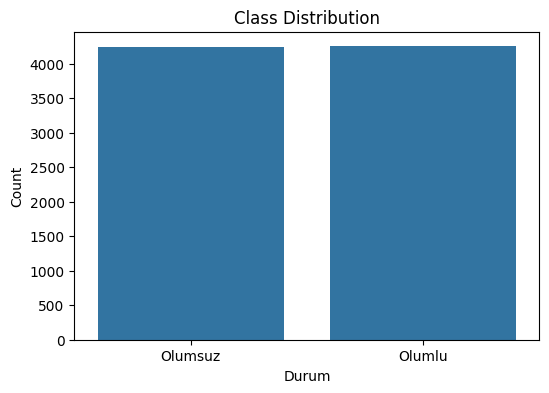

In [8]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Durum', data=df)
plt.title('Class Distribution')
plt.xlabel('Durum')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Olumsuz', 'Olumlu'])
plt.show()

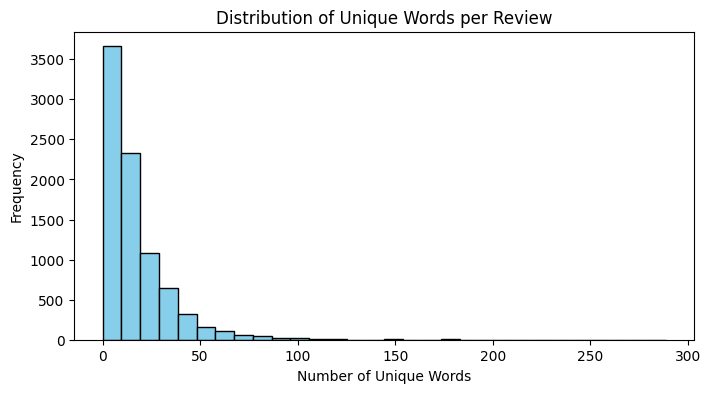

In [9]:
# 
df['Unique_Words'] = df['Processed_Review'].apply(lambda x: len(set(x.split())))

# 
plt.figure(figsize=(8, 4))
plt.hist(df['Unique_Words'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Unique Words per Review')
plt.xlabel('Number of Unique Words')
plt.ylabel('Frequency')
plt.show()

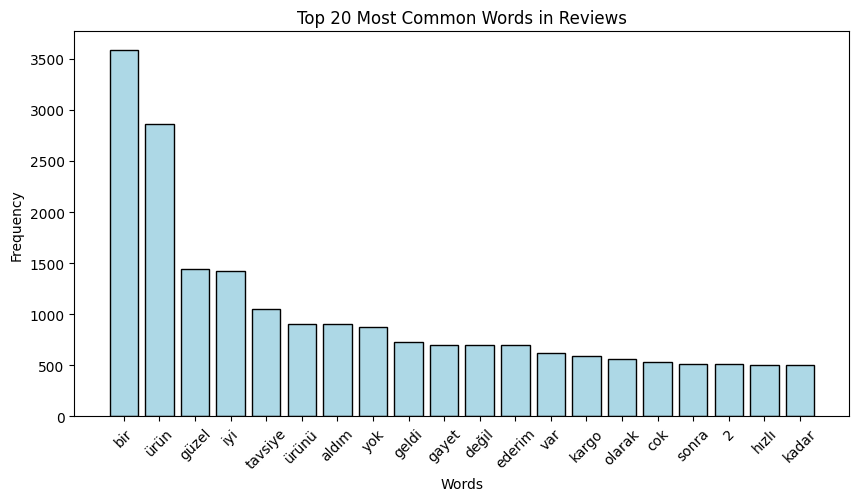

In [10]:
from collections import Counter

# 
all_words = ' '.join(df['Processed_Review']).split()

# Frekanslar
word_counts = Counter(all_words)

# 
most_common_words = word_counts.most_common(20)
words, counts = zip(*most_common_words)  

# 
plt.figure(figsize=(10, 5))
plt.bar(words, counts, color='lightblue', edgecolor='black')
plt.title('Top 20 Most Common Words in Reviews')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


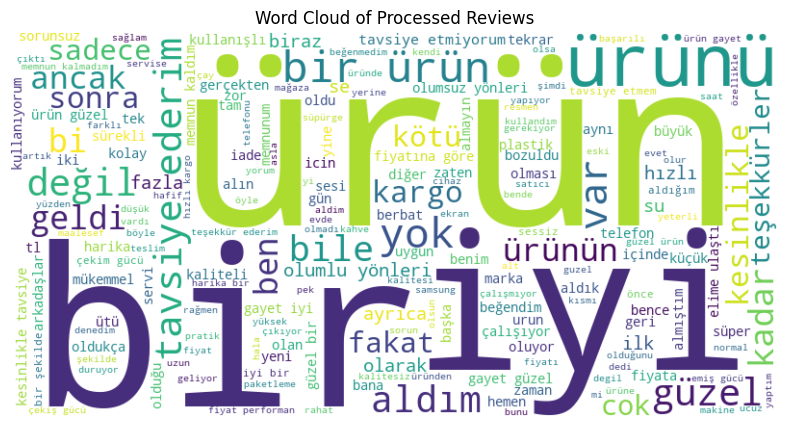

In [11]:
# word cloud
all_words = ' '.join(df['Processed_Review'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

# 
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Processed Reviews')
plt.show()

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
# TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust max_features as needed

# Fit and transform 
X = tfidf_vectorizer.fit_transform(df['Processed_Review']).toarray()

# 
print("Shape of TF-IDF Matrix:", X.shape)


Shape of TF-IDF Matrix: (8489, 5000)


In [13]:
from sklearn.preprocessing import LabelEncoder

# Numerik değere dönüştürme
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['Durum'])

# 
print("Classes:", label_encoder.classes_)


Classes: ['Olumlu' 'Olumsuz']


In [14]:
from sklearn.model_selection import train_test_split

# 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training Set Size:", X_train.shape)
print("Testing Set Size:", X_test.shape)




Training Set Size: (6791, 5000)
Testing Set Size: (1698, 5000)


Logistic Regression Accuracy: 0.892226148409894
[[759 100]
 [ 83 756]]
              precision    recall  f1-score   support

           0       0.90      0.88      0.89       859
           1       0.88      0.90      0.89       839

    accuracy                           0.89      1698
   macro avg       0.89      0.89      0.89      1698
weighted avg       0.89      0.89      0.89      1698



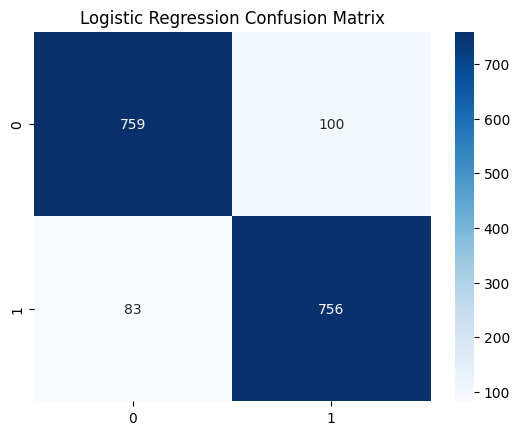

In [15]:
# Logistic Regression modeli
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
log_pred = log_model.predict(X_test)

# Model değerlendirme
print("Logistic Regression Accuracy:", accuracy_score(y_test, log_pred))
print(confusion_matrix(y_test, log_pred))
print(classification_report(y_test, log_pred))

# Confusion Matrix görselleştirme
sns.heatmap(confusion_matrix(y_test, log_pred), annot=True, cmap='Blues', fmt='d')
plt.title('Logistic Regression Confusion Matrix')
plt.show()


KNN Accuracy: 0.5335689045936396
[[849  10]
 [782  57]]
              precision    recall  f1-score   support

           0       0.52      0.99      0.68       859
           1       0.85      0.07      0.13       839

    accuracy                           0.53      1698
   macro avg       0.69      0.53      0.40      1698
weighted avg       0.68      0.53      0.41      1698



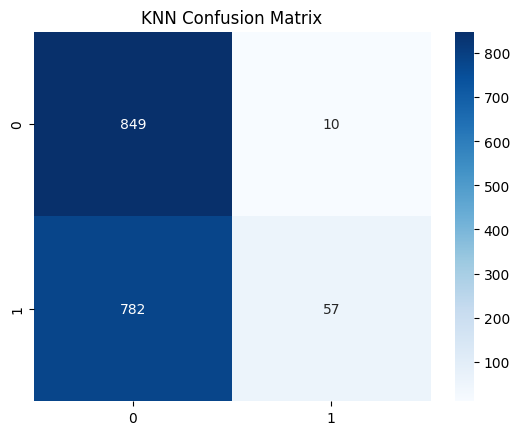

In [16]:
# KNN modeli
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)

# Model değerlendirme
print("KNN Accuracy:", accuracy_score(y_test, knn_pred))
print(confusion_matrix(y_test, knn_pred))
print(classification_report(y_test, knn_pred))

# Confusion Matrix görselleştirme
sns.heatmap(confusion_matrix(y_test, knn_pred), annot=True, cmap='Blues', fmt='d')
plt.title('KNN Confusion Matrix')
plt.show()


SVM Accuracy: 0.9051825677267373
[[775  84]
 [ 77 762]]
              precision    recall  f1-score   support

           0       0.91      0.90      0.91       859
           1       0.90      0.91      0.90       839

    accuracy                           0.91      1698
   macro avg       0.91      0.91      0.91      1698
weighted avg       0.91      0.91      0.91      1698



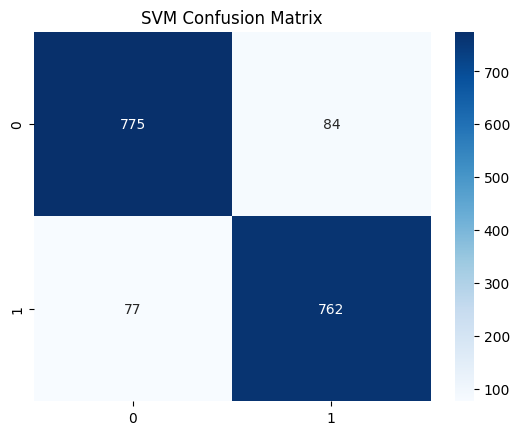

In [17]:
# SVM modeli
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)

# Model değerlendirme
print("SVM Accuracy:", accuracy_score(y_test, svm_pred))
print(confusion_matrix(y_test, svm_pred))
print(classification_report(y_test, svm_pred))

# Confusion Matrix görselleştirme
sns.heatmap(confusion_matrix(y_test, svm_pred), annot=True, cmap='Blues', fmt='d')
plt.title('SVM Confusion Matrix')
plt.show()


Decision Tree Accuracy: 0.7791519434628975
[[717 142]
 [233 606]]
              precision    recall  f1-score   support

           0       0.75      0.83      0.79       859
           1       0.81      0.72      0.76       839

    accuracy                           0.78      1698
   macro avg       0.78      0.78      0.78      1698
weighted avg       0.78      0.78      0.78      1698



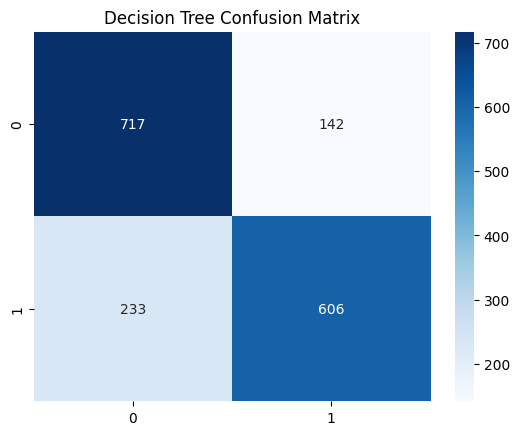

In [18]:
# Decision Tree modeli
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

# Model değerlendirme
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_pred))
print(confusion_matrix(y_test, dt_pred))
print(classification_report(y_test, dt_pred))

# Confusion Matrix görselleştirme
sns.heatmap(confusion_matrix(y_test, dt_pred), annot=True, cmap='Blues', fmt='d')
plt.title('Decision Tree Confusion Matrix')
plt.show()


Random Forest Accuracy: 0.8545347467608951
[[755 104]
 [143 696]]
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       859
           1       0.87      0.83      0.85       839

    accuracy                           0.85      1698
   macro avg       0.86      0.85      0.85      1698
weighted avg       0.86      0.85      0.85      1698



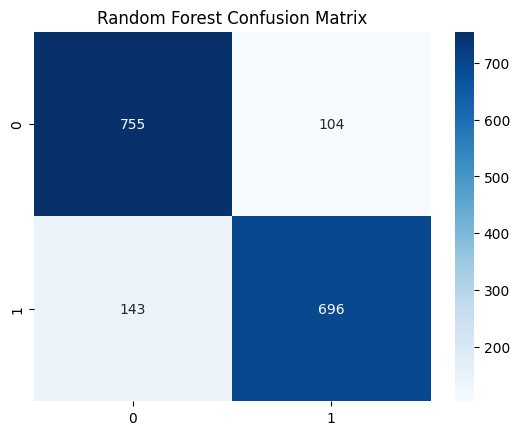

In [19]:
# Random Forest modeli
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

# Model değerlendirme
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print(confusion_matrix(y_test, rf_pred))
print(classification_report(y_test, rf_pred))

# Confusion Matrix görselleştirme
sns.heatmap(confusion_matrix(y_test, rf_pred), annot=True, cmap='Blues', fmt='d')
plt.title('Random Forest Confusion Matrix')
plt.show()


XGBoost Accuracy: 0.8539458186101295
[[712 147]
 [101 738]]
              precision    recall  f1-score   support

           0       0.88      0.83      0.85       859
           1       0.83      0.88      0.86       839

    accuracy                           0.85      1698
   macro avg       0.85      0.85      0.85      1698
weighted avg       0.86      0.85      0.85      1698



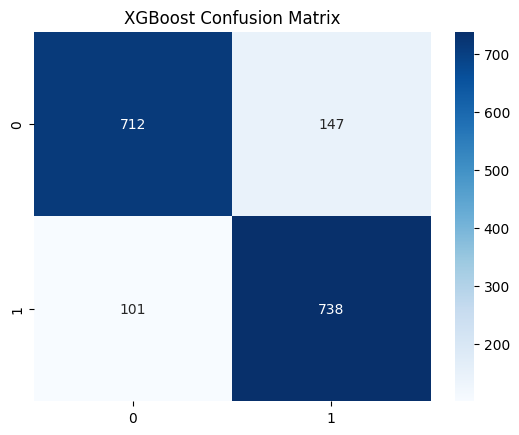

In [20]:
# XGBoost modeli
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

# Model değerlendirme
print("XGBoost Accuracy:", accuracy_score(y_test, xgb_pred))
print(confusion_matrix(y_test, xgb_pred))
print(classification_report(y_test, xgb_pred))

# Confusion Matrix görselleştirme
sns.heatmap(confusion_matrix(y_test, xgb_pred), annot=True, cmap='Blues', fmt='d')
plt.title('XGBoost Confusion Matrix')
plt.show()


ANN Accuracy: 0.8574793875147232
[[762  97]
 [145 694]]
              precision    recall  f1-score   support

           0       0.84      0.89      0.86       859
           1       0.88      0.83      0.85       839

    accuracy                           0.86      1698
   macro avg       0.86      0.86      0.86      1698
weighted avg       0.86      0.86      0.86      1698



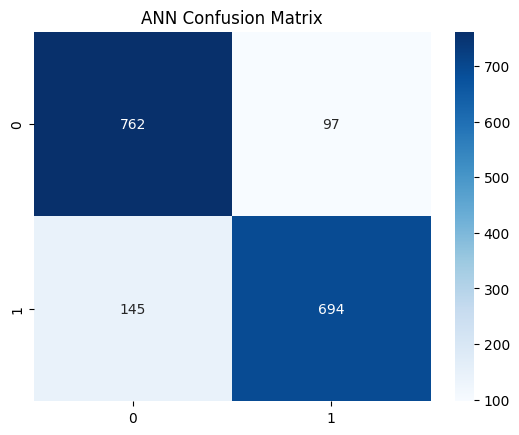

In [21]:
# ANN modeli
ann_model = MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=300, random_state=42)
ann_model.fit(X_train, y_train)
ann_pred = ann_model.predict(X_test)

# Model değerlendirme
print("ANN Accuracy:", accuracy_score(y_test, ann_pred))
print(confusion_matrix(y_test, ann_pred))
print(classification_report(y_test, ann_pred))

# Confusion Matrix görselleştirme
sns.heatmap(confusion_matrix(y_test, ann_pred), annot=True, cmap='Blues', fmt='d')
plt.title('ANN Confusion Matrix')
plt.show()


In [22]:
from sklearn.metrics import roc_curve, auc

# ROC ve AUC fonksiyonları için yardımcı fonksiyon
def plot_roc_curve(y_test, y_pred_proba, model_name):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend(loc='lower right')
    plt.show()


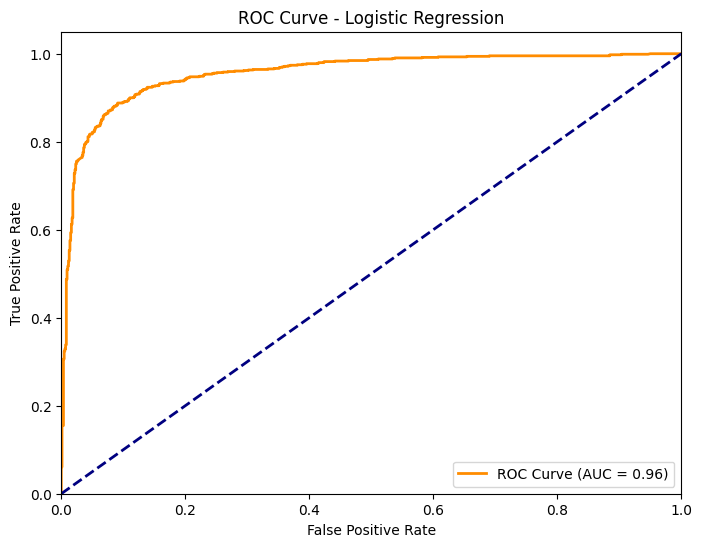

In [23]:
# Logistic Regression ROC Eğrisi
log_pred_proba = log_model.predict_proba(X_test)[:, 1]
plot_roc_curve(y_test, log_pred_proba, 'Logistic Regression')


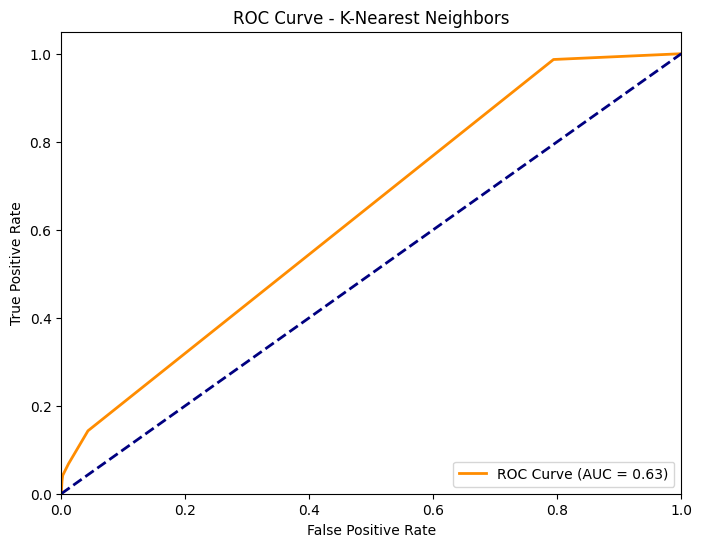

In [24]:
# KNN ROC Eğrisi
knn_pred_proba = knn_model.predict_proba(X_test)[:, 1]
plot_roc_curve(y_test, knn_pred_proba, 'K-Nearest Neighbors')


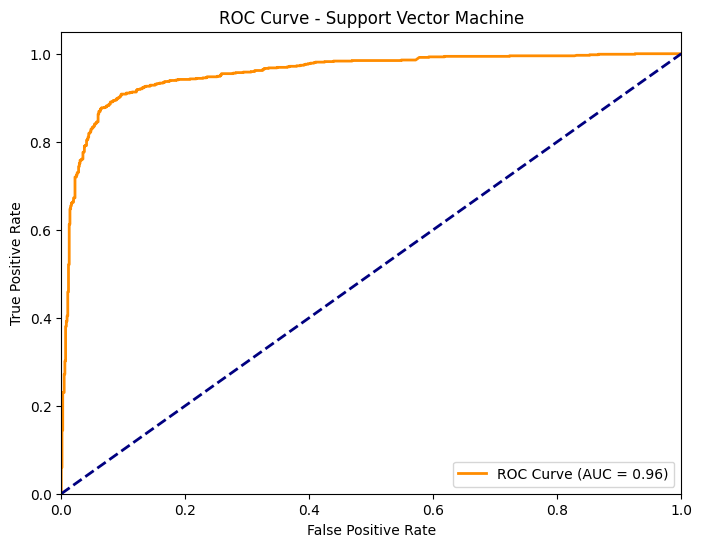

In [25]:
# SVM modeli güncelleme (probability=True)
svm_model = SVC(probability=True)
svm_model.fit(X_train, y_train)
svm_pred_proba = svm_model.predict_proba(X_test)[:, 1]
plot_roc_curve(y_test, svm_pred_proba, 'Support Vector Machine')


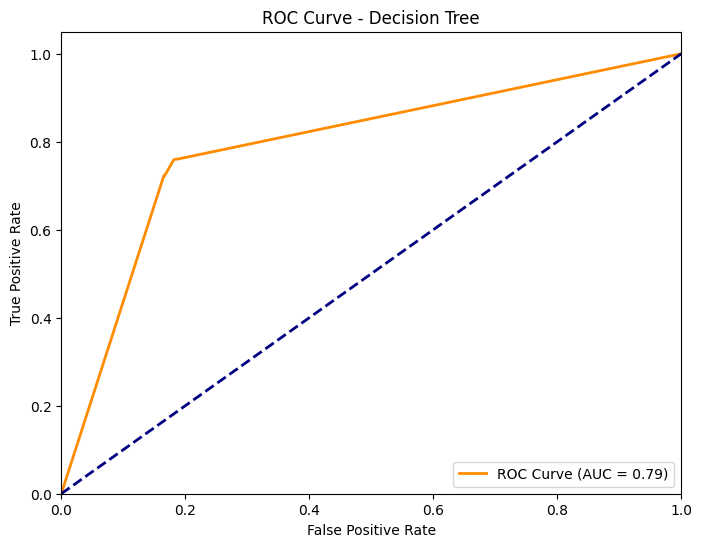

In [26]:
# Decision Tree ROC Eğrisi
dt_pred_proba = dt_model.predict_proba(X_test)[:, 1]
plot_roc_curve(y_test, dt_pred_proba, 'Decision Tree')


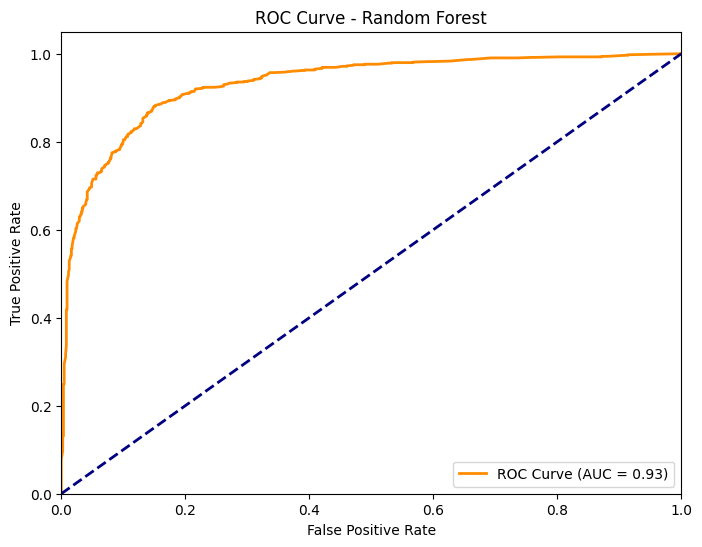

In [27]:
# Random Forest ROC Eğrisi
rf_pred_proba = rf_model.predict_proba(X_test)[:, 1]
plot_roc_curve(y_test, rf_pred_proba, 'Random Forest')


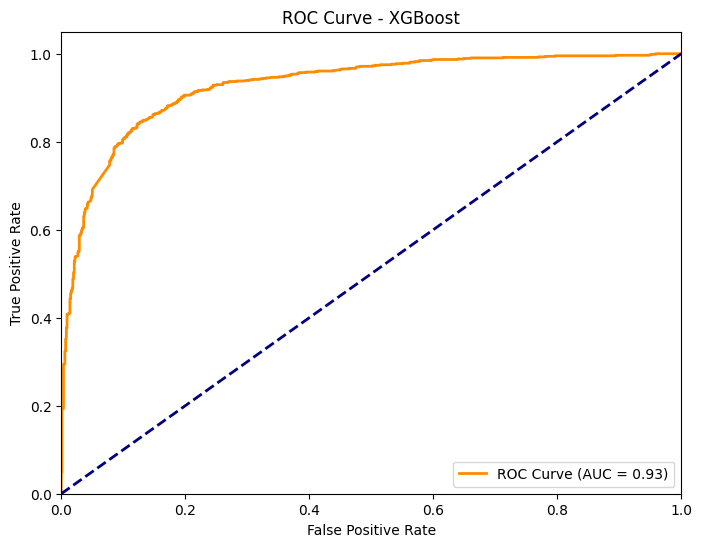

In [28]:
# XGBoost ROC Eğrisi
xgb_pred_proba = xgb_model.predict_proba(X_test)[:, 1]
plot_roc_curve(y_test, xgb_pred_proba, 'XGBoost')


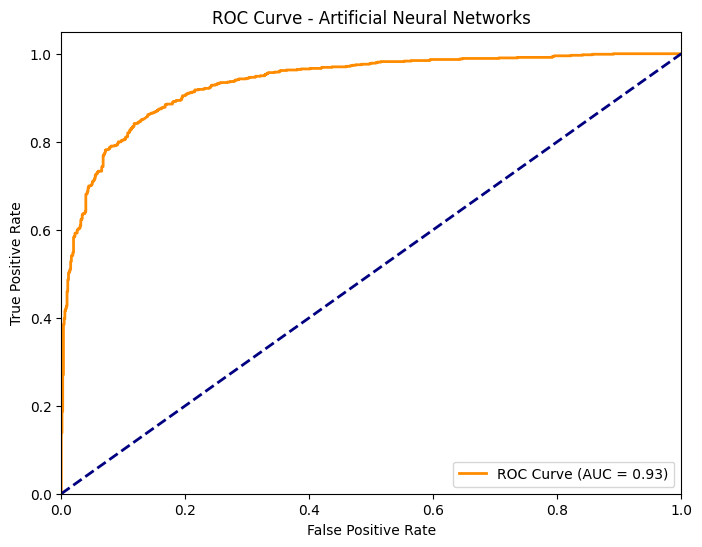

In [29]:
# ANN ROC Eğrisi
ann_pred_proba = ann_model.predict_proba(X_test)[:, 1]
plot_roc_curve(y_test, ann_pred_proba, 'Artificial Neural Networks')


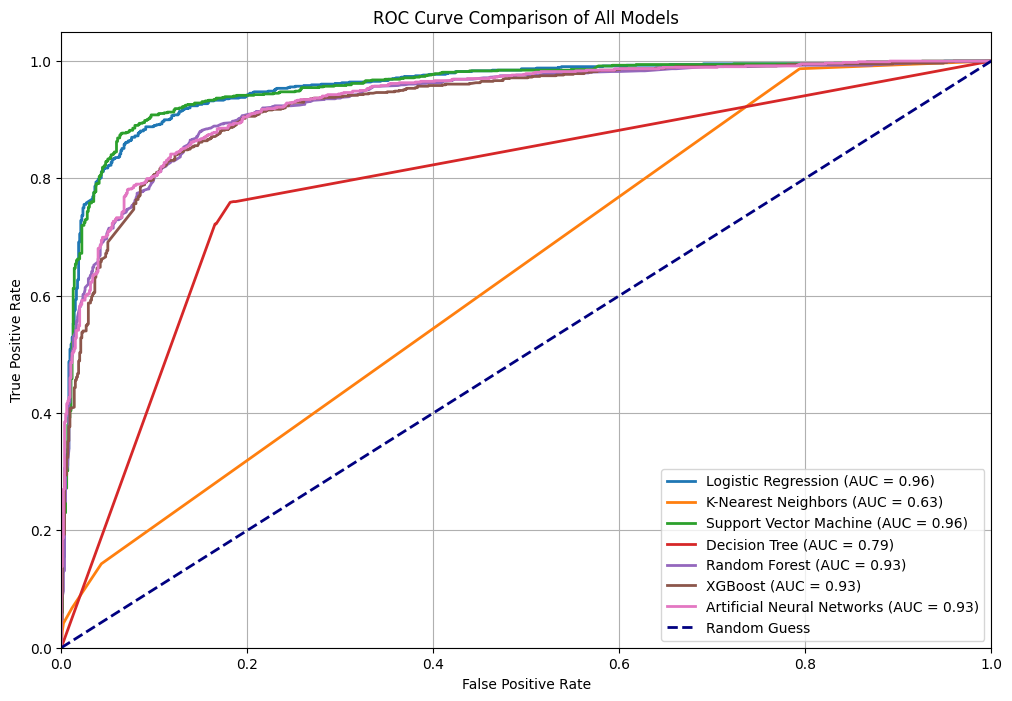

In [30]:
from sklearn.metrics import roc_curve, auc

# Tüm modellerin ROC eğrilerini aynı grafik üzerinde çizme fonksiyonu
def plot_all_roc_curves(models, X_test, y_test):
    plt.figure(figsize=(12, 8))

    for model_name, model in models.items():
        # Modellerin tahmin olasılıklarını elde et
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        roc_auc = auc(fpr, tpr)
        
        # ROC eğrisini çiz
        plt.plot(fpr, tpr, lw=2, label=f'{model_name} (AUC = {roc_auc:.2f})')
    
    # Rastgele tahmin eğrisi (diagonal çizgi)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
    
    # Grafik detayları
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve Comparison of All Models')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

# Modellerin isimleri ve nesneleri
models = {
    'Logistic Regression': log_model,
    'K-Nearest Neighbors': knn_model,
    'Support Vector Machine': svm_model,
    'Decision Tree': dt_model,
    'Random Forest': rf_model,
    'XGBoost': xgb_model,
    'Artificial Neural Networks': ann_model
}

# Tüm modeller için ROC eğrilerini aynı grafikte göster
plot_all_roc_curves(models, X_test, y_test)


In [31]:
from sklearn.model_selection import cross_val_score

# Modellerin Cross-Validation değerlendirmesi
def evaluate_models_with_cross_validation(models, X, y, cv=5):
    results = {}

    for model_name, model in models.items():
        # 5-Fold Cross-Validation ile modeli değerlendir
        scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
        results[model_name] = scores
        print(f'{model_name} Cross-Validation Scores: {scores}')
        print(f'{model_name} Average Accuracy: {np.mean(scores):.4f} ± {np.std(scores):.4f}')
        print('-' * 50)

    return results

# Modellerin isimleri ve nesneleri
models = {
    'Logistic Regression': log_model,
    'K-Nearest Neighbors': knn_model,
    'Support Vector Machine': svm_model,
    'Decision Tree': dt_model,
    'Random Forest': rf_model,
    'XGBoost': xgb_model,
    'Artificial Neural Networks': ann_model
}

# Cross-validation sonuçlarını değerlendir
cross_val_results = evaluate_models_with_cross_validation(models, X, y, cv=5)


Logistic Regression Cross-Validation Scores: [0.88987044 0.90753828 0.89104829 0.89575972 0.90100177]
Logistic Regression Average Accuracy: 0.8970 ± 0.0066
--------------------------------------------------
K-Nearest Neighbors Cross-Validation Scores: [0.53180212 0.67667845 0.66666667 0.67550059 0.67000589]
K-Nearest Neighbors Average Accuracy: 0.6441 ± 0.0563
--------------------------------------------------
Support Vector Machine Cross-Validation Scores: [0.893404   0.91401649 0.90223793 0.90400471 0.90394814]
Support Vector Machine Average Accuracy: 0.9035 ± 0.0066
--------------------------------------------------
Decision Tree Cross-Validation Scores: [0.78504122 0.80270907 0.77267373 0.80094229 0.79257513]
Decision Tree Average Accuracy: 0.7908 ± 0.0110
--------------------------------------------------
Random Forest Cross-Validation Scores: [0.86690224 0.87043581 0.84923439 0.87279152 0.87271656]
Random Forest Average Accuracy: 0.8664 ± 0.0089
----------------------------------